# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [9]:
%load_ext autoreload

In [10]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [12]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: total: 1.23 s
Wall time: 2.33 s
Train ROC-AUC 0.9898
Valid ROC-AUC 0.9104
Test ROC-AUC 0.9140


**Проверим, что график в случае `plot=True` строится:**

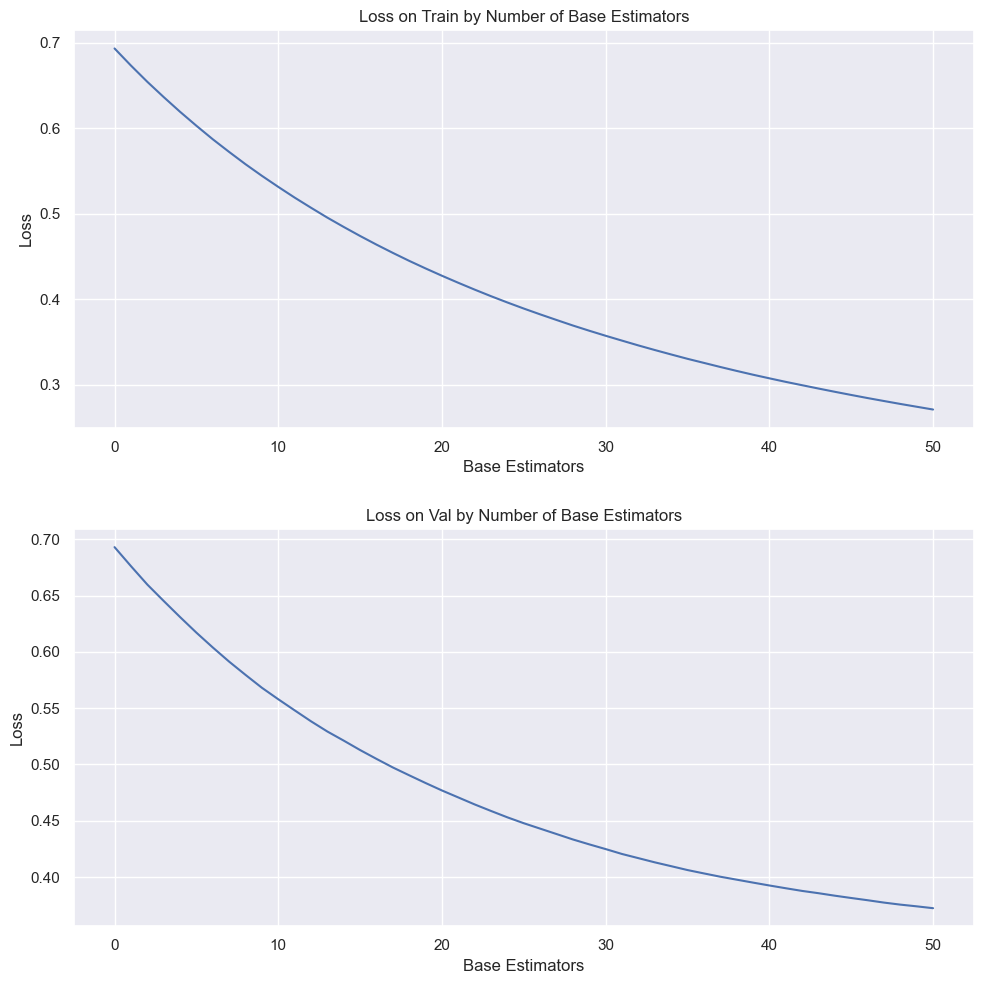

Train ROC-AUC 0.9961
Valid ROC-AUC 0.9251
Test ROC-AUC 0.9286


In [13]:
boosting = Boosting(n_estimators=50, plot=True)

boosting.fit(x_train, y_train, x_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

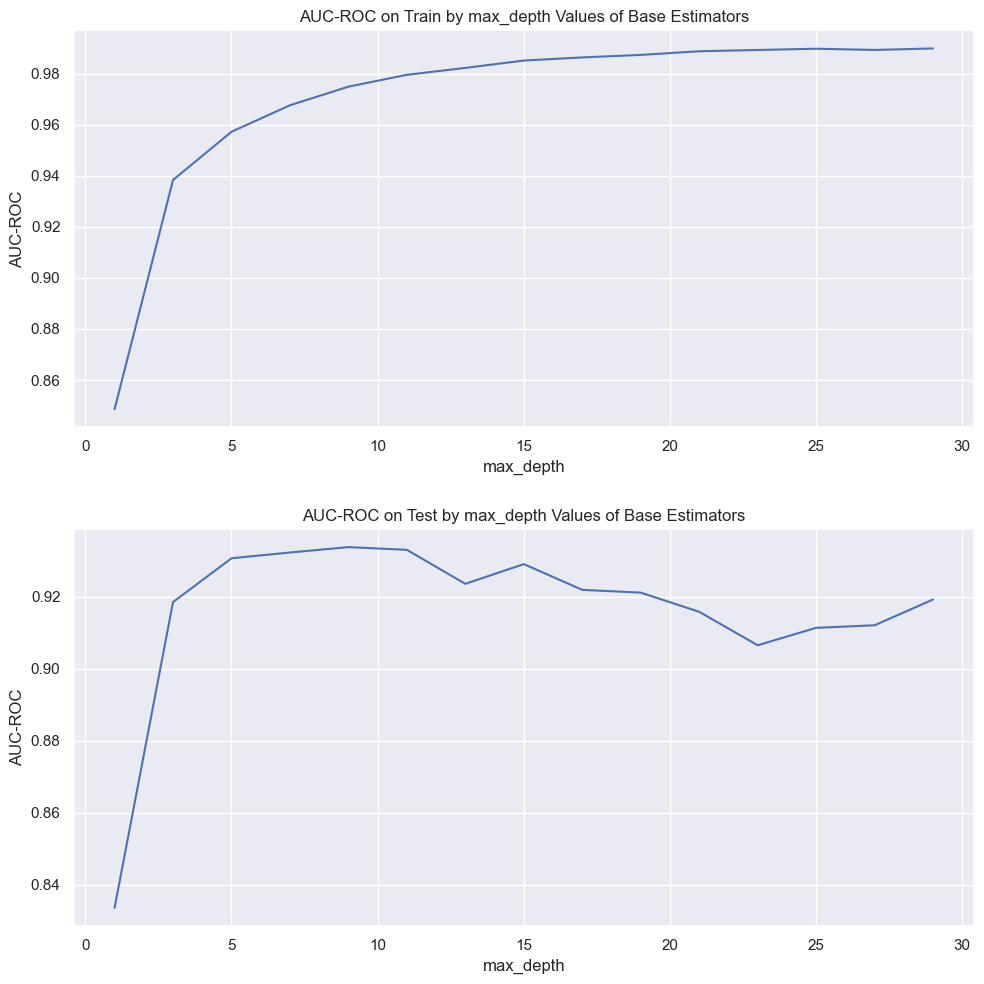

In [14]:
results = {
    "score_train": [],
    "score_test": []}

depths = range(1, 30, 2)

# подсчёты AUC-ROC
for depth in depths:
    base_model_params = {"max_depth": depth}
    gbm = Boosting(base_model_params=base_model_params)
    gbm.fit(x_train, y_train, x_valid, y_valid)
    results["score_train"] += [gbm.score(x_train, y_train)]
    results["score_test"] += [gbm.score(x_test, y_test)]


# графики
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(depths, results["score_train"])
ax[0].set_title("AUC-ROC on Train by max_depth Values of Base Estimators")
ax[0].set_xlabel("max_depth")
ax[0].set_ylabel("AUC-ROC")

ax[1].plot(depths, results["score_test"])
ax[1].set_title("AUC-ROC on Test by max_depth Values of Base Estimators")
ax[1].set_xlabel("max_depth")
ax[1].set_ylabel("AUC-ROC")

fig.tight_layout(h_pad=2)
plt.show()

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [16]:
import optuna

In [17]:
class Objective(object):
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val

    def __call__(self, trial):
        params = {
            "base_model_params": {
                "max_depth": trial.suggest_int("max_depth", 1, 30),
                "min_samples_split": trial.suggest_int("min_samples_split", 2, 50),
                "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50)
            },
            "n_estimators": trial.suggest_int("n_estimators", 10, 300, step=10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1., log=True),
            "subsample": trial.suggest_float("subsample", 0.1, 1.),
            "early_stopping_rounds": trial.suggest_int("early_stopping_rounds", 1, 50)
        }

        gbm = Boosting(**params)
        gbm.fit(self.x_train, self.y_train, self.x_val, self.y_val)
        return gbm.score(self.x_val, self.y_val)


objective = Objective(x_train, y_train, x_valid, y_valid)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print()
print("Best trial:")
trial = study.best_trial

print("Best Score: ", trial.value)
print()
print("Params: ")
for key, value in trial.params.items():
    print("{}: {}".format(key, value))

[I 2024-08-24 00:11:52,182] A new study created in memory with name: no-name-abe1bb04-d151-4eb2-be76-7eb2082cbd36


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-08-24 00:12:53,574] Trial 0 finished with value: 0.93893080721852 and parameters: {'max_depth': 18, 'min_samples_split': 39, 'min_samples_leaf': 37, 'n_estimators': 200, 'learning_rate': 0.12235774342529603, 'subsample': 0.9084871440986856, 'early_stopping_rounds': 40}. Best is trial 0 with value: 0.93893080721852.
[I 2024-08-24 00:13:11,556] Trial 1 finished with value: 0.9378588367324296 and parameters: {'max_depth': 24, 'min_samples_split': 45, 'min_samples_leaf': 10, 'n_estimators': 110, 'learning_rate': 0.00029399376887655925, 'subsample': 0.31413647062592953, 'early_stopping_rounds': 17}. Best is trial 0 with value: 0.93893080721852.
[I 2024-08-24 00:13:32,690] Trial 2 finished with value: 0.9379833545253038 and parameters: {'max_depth': 12, 'min_samples_split': 26, 'min_samples_leaf': 39, 'n_estimators': 170, 'learning_rate': 0.17922648229258356, 'subsample': 0.6074689417239213, 'early_stopping_rounds': 2}. Best is trial 0 with value: 0.93893080721852.
[I 2024-08-24 00:1

`Best trial:`

`Best Score:  0.9452552734482569`

`Params: `

`max_depth: 2`

`min_samples_split: 28`

`min_samples_leaf: 6`

`n_estimators: 300`

`learning_rate: 0.9651777902059983`

`subsample: 0.7190116361925348`

`early_stopping_rounds: 18`

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [18]:
def plot_calibration_curve(y_test, preds, color="blue", name=None):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, c=color, label=name)

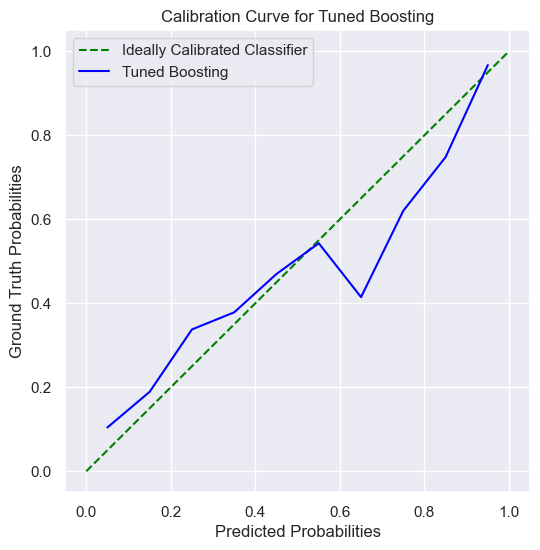

In [19]:
plt.figure(figsize=(6,6))

# Ideally Calibrated Classifier (linear function y=x)
x = np.linspace(0.0, 1.0)
plt.plot(x, x, label="Ideally Calibrated Classifier", linestyle='--', color='green')

# Tuned Boosting
gbm = Boosting(
    base_model_params={"max_depth": 5,
                       "min_samples_split": 50,
                       "min_samples_leaf": 16
                       },
    n_estimators=110,
    learning_rate=0.8592282858263769,
    subsample=0.9907961168931667,
    early_stopping_rounds=12
    )
gbm.fit(x_train, y_train, x_valid, y_valid)
y_pred = gbm.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, y_pred, color="blue", name="Tuned Boosting")

plt.ylim([-0.05, 1.05])
plt.title("Calibration Curve for Tuned Boosting")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Ground Truth Probabilities")
plt.legend()
plt.show()

Получилось не очень хорошо:(

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?